# 인공지능과 가위바위보 하기!!!

## 데이터 불러오기 + Resize 하기

In [1]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## 가위 이미지를 불러와서 28x28 사이즈로 변경

In [18]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


##  바위 이미지를 불러와서 28x28 사이즈로 변경

In [19]:
import os# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg") 

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


## 바위 이미지를 불러와서 28x28 사이즈로 변경

In [20]:
import os# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ",image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffelrock_scissor_paper/paper
보 이미지 resize 완료!


## 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링

In [21]:
import numpy as np

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=600   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 600 입니다.
x_train shape: (600, 28, 28, 3)
y_train shape: (600,)


## 이미지 부르기

라벨:  0


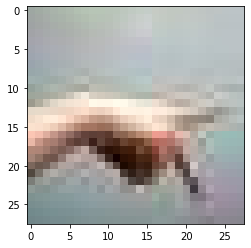

In [23]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (

## 딥러닝 네트워크 학습시키기

In [25]:
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Before Reshape - x_train_norm shape: (600, 28, 28, 3)
After Reshape - x_train_reshaped shape: (600, 28, 28, 3)
Epoch 1/10
19/19 [==============================] - 0s 5ms/step - loss: 1.0637 - accuracy: 0.4633
Epoch 2/10
19/19 [==============================] - 0s 5ms/step - loss: 0.9457 - accuracy: 0.6083
Epoch 3/10
19/19 [==============================] - 0s 4ms/step - loss: 0.7996 - accuracy: 0.6550
Epoch 4/10
19/19 [==============================] - 0s 4ms/step - loss: 0.7142 - accuracy: 0.6883
Epoch 5/10
19/19 [==============================] - 0s 4ms/step - loss: 0.6326 - accuracy: 0.7450
Epoch 6/10
19/19 [==============================] - 0s 4ms/step - loss: 0.5902 - accuracy: 0.7617
Epoch 7/10
19/19 [==============================] - 0s 4ms/step - loss: 0.5581 - accuracy: 0.7783
Epoch 8/10
19/19 [==============================] - 0s 4ms/step - loss: 0.4870 - accuracy: 0.8283
Epoch 9/10
19/19 [==============================] - 0s 4ms/step - loss: 0.4160 - accuracy: 0.8650
Epoch 1

## 얼마나 잘 만들었는지 확인하기(테스트)

In [26]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0

print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))



model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_test_reshaped, y_test, epochs=10)

학습데이터(x_train)의 이미지 개수는 600 입니다.
Before Reshape - x_test_norm shape: (600, 28, 28, 3)
After Reshape - x_test_reshaped shape: (600, 28, 28, 3)
Epoch 1/10
19/19 [==============================] - 0s 5ms/step - loss: 0.3833 - accuracy: 0.8550
Epoch 2/10
19/19 [==============================] - 0s 5ms/step - loss: 0.3448 - accuracy: 0.8850
Epoch 3/10
19/19 [==============================] - 0s 4ms/step - loss: 0.3360 - accuracy: 0.8800
Epoch 4/10
19/19 [==============================] - 0s 4ms/step - loss: 0.2844 - accuracy: 0.9133
Epoch 5/10
19/19 [==============================] - 0s 5ms/step - loss: 0.2553 - accuracy: 0.9167
Epoch 6/10
19/19 [==============================] - 0s 4ms/step - loss: 0.2127 - accuracy: 0.9417
Epoch 7/10
19/19 [==============================] - 0s 4ms/step - loss: 0.1937 - accuracy: 0.9500
Epoch 8/10
19/19 [==============================] - 0s 6ms/step - loss: 0.1653 - accuracy: 0.9583
Epoch 9/10
19/19 [==============================] - 0s 7ms/step - loss: 0.

## 훈련시킨 model을 사용하여 test_accuracy를 측정

In [27]:
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 0.1429 - accuracy: 0.9633
test_loss: 0.14290012419223785 
test_accuracy: 0.9633333086967468
